# Lab 8: NumPy (due Sunday, Nov 12)
---
Part 1 and Part 2 of [Advent of Code 2015 Day 6](https://adventofcode.com/2015/day/6).

**Hints:**
- You can use a 1000x1000 2D matrix to represent the grid of lights
- Here is some python code you can use to load in the input file, and for each line, split the instructions into a list of items:
```python
    with open("data/A6_input.txt") as fp:
      for line in fp:
          e = line.strip().split(" ")
          print(e)
```

- You will need some if statements to determine which instruction it is, and how to act on them.
- The `.split()` method is your friend.
- Remember to add 1 to the second x-coordinate and the second y-coordinate, to handle how Python indexes into arrays. For example, Z[0:5] results in the first, second, third, and fourth values of the array Z. To get the first 5 values you would have to use Z[0:6].


In [3]:
# Imports
import numpy as np

## Problem 1

**Day 6: Probably a Fire Hazard** :  Because your neighbors keep defeating you in the holiday house decorating contest year after year, you've decided to deploy one million lights in a 1000x1000 grid.Furthermore, because you've been especially nice this year, Santa has mailed you instructions on how to display the ideal lighting configuration. Lights in your grid are numbered from 0 to 999 in each direction; the lights at each corner are at 0,0, 0,999, 999,999, and 999,0. The instructions include whether to turn on, turn off, or toggle various inclusive ranges given as coordinate pairs. Each coordinate pair represents opposite corners of a rectangle, inclusive; a coordinate pair like 0,0 through 2,2 therefore refers to 9 lights in a 3x3 square. The lights all start turned off.To defeat your neighbors this year, all you have to do is set up your lights by doing the instructions Santa sent you in order.

For example:

- turn on 0,0 through 999,999 would turn on (or leave on) every light.
- toggle 0,0 through 999,0 would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.
- turn off 499,499 through 500,500 would turn off (or leave off) the middle four lights.
After following the instructions, how many lights are lit?

In [10]:
# ENTER YOUR CODE HERE

lights = np.zeros((1000, 1000), dtype=int)

with open("data/A6_input.txt") as fp:
    for line in fp:
        e = line.strip().split(" ")
        
        if e[0] =='turn':
            x1 = int(e[2].split(',')[0])
            x2 = int(e[4].split(',')[0])
            y1 = int(e[2].split(',')[1])
            y2 = int(e[4].split(',')[1])
            
            lights[x1:x2+1, y1:y2+1] = np.where (e[1] == 'on', 1, 0) 
            
        else:
            x1 = int(e[1].split(',')[0])
            x2 = int(e[3].split(',')[0])
            y1 = int(e[1].split(',')[1])
            y2 = int(e[3].split(',')[1])

            lights[x1:x2+1, y1:y2+1] = np.where (lights[x1:x2+1, y1:y2+1] == 0, 1, 0)          

    print(f'There are {lights.sum()} lights turned on.')

There are 569999 lights turned on.


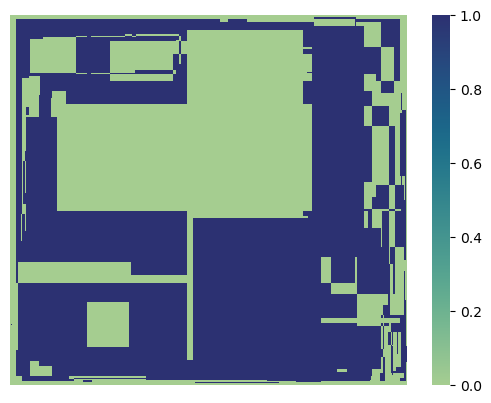

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 

ax = sns.heatmap (data=lights, cmap="crest")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# or use : plt.imshow(lights, cmap='crest')

## Problem 2

You just finish implementing your winning light pattern when you realize you mistranslated Santa's message from Ancient Nordic Elvish. The light grid you bought actually has individual brightness controls; each light can have a brightness of zero or more. The lights all start at zero. 
- The phrase turn on actually means that you should increase the brightness of those lights by 1. 
- The phrase turn off actually means that you should decrease the brightness of those lights by 1, to a minimum of zero.
- The phrase toggle actually means that you should increase the brightness of those lights by 2.

For example:

    turn on 0,0 through 0,0 would increase the total brightness by 1.
    toggle 0,0 through 999,999 would increase the total brightness by 2000000.

What is the total brightness of all lights combined after following Santa's instructions?

In [6]:
# ENTER YOUR CODE HERE

lights = np.zeros((1000, 1000), dtype=int)

with open("data/A6_input.txt") as fp:
    for line in fp:
        e = line.strip().split(" ")
        
        if e[0] =='turn':
            x1 = int(e[2].split(',')[0])
            x2 = int(e[4].split(',')[0])
            y1 = int(e[2].split(',')[1])
            y2 = int(e[4].split(',')[1])
        
            lights[x1:x2+1, y1:y2+1] = np.where (e[1] == 'on',
                                                 lights[x1:x2+1, y1:y2+1] + 1,
                                                 np.where(lights[x1:x2+1, y1:y2+1] == 0, 
                                                          0, 
                                                          lights[x1:x2+1, y1:y2+1] -1)
                                                )
            
        else:
            x1 = int(e[1].split(',')[0])
            x2 = int(e[3].split(',')[0])
            y1 = int(e[1].split(',')[1])
            y2 = int(e[3].split(',')[1])

            lights[x1:x2+1, y1:y2+1] = lights[x1:x2+1, y1:y2+1] + 2          

    print(f'Total brightness is {lights.sum()}.')


Total brightness is 17836115.


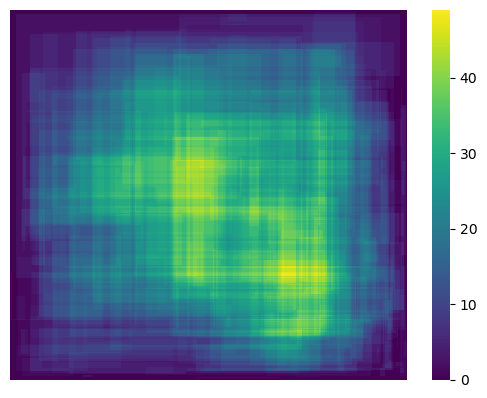

In [8]:
ax = sns.heatmap (data=lights, cmap="viridis") #crest
ax.set_xticks([])
ax.set_yticks([])
plt.show()

---
This lab was adapted from Paul Gribble's [Scientific Computing course](https://gribblelab.org/teaching/scicomp2020/).